# July 2023 Cu-F

dTHF + LiBF4 + dEtOH



In [4]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [5]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F')

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/'

dynamic_run = 207168 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/30s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck'

# dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/15s'
# dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-15s-bck'

delta_t = 30

## Summary of 60 Hz data

/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207161/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207169/__model-profile.dat


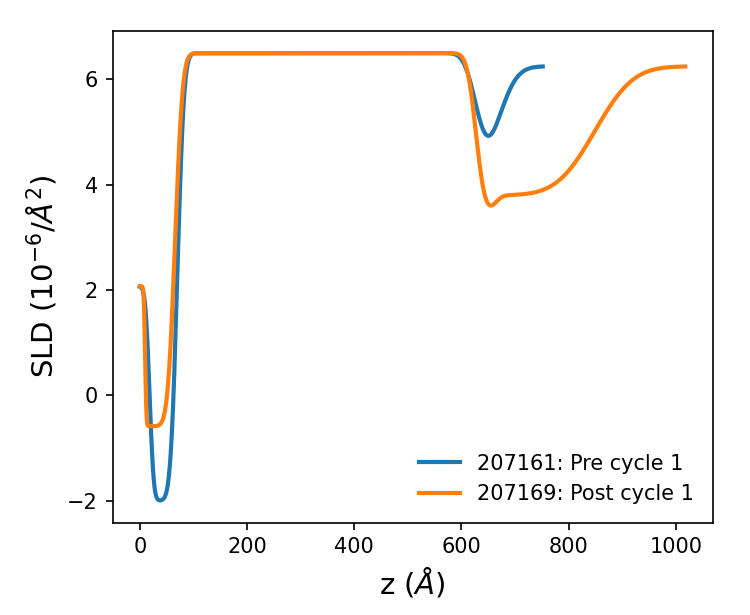

In [6]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207161, "207161: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(207169, "207169: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


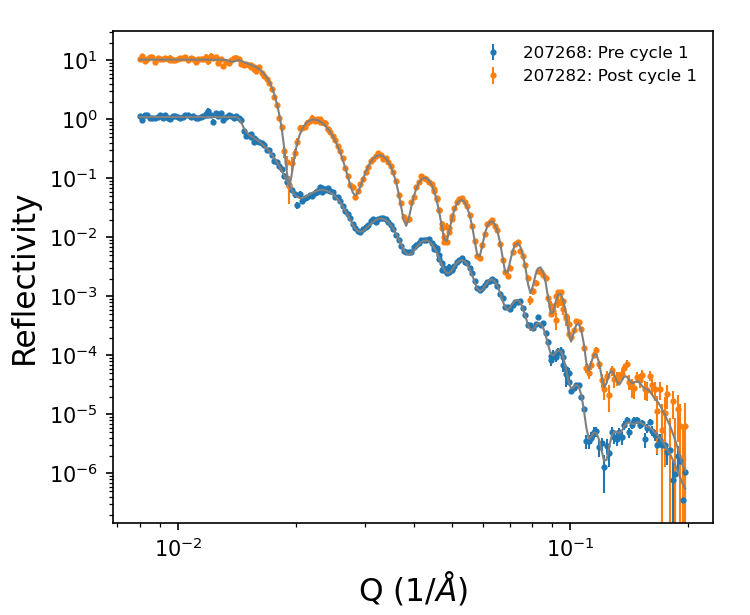

In [7]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207268, '207268: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207282, '207282: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


## CP 1: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/30s
23
Ref r207168_t000000.txt
Skipped: 0


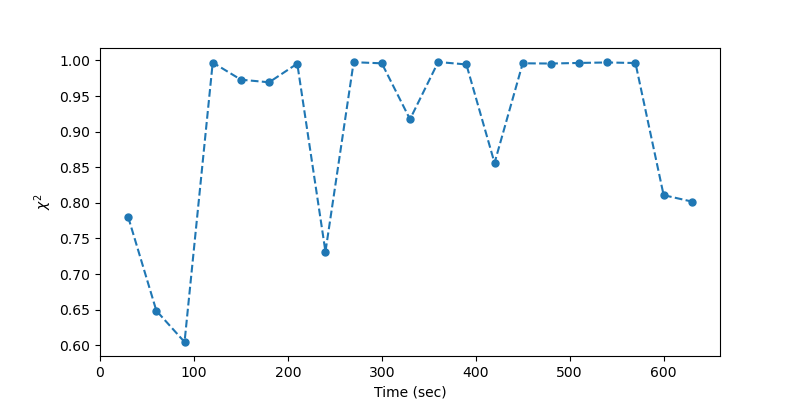

In [8]:
importlib.reload(summary_plots)
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207168, dyn_data_dir, first=0, last=-1, out_array=None)

## CP 2: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/30s
47
Ref r207176_t000000.txt
Skipped: 0


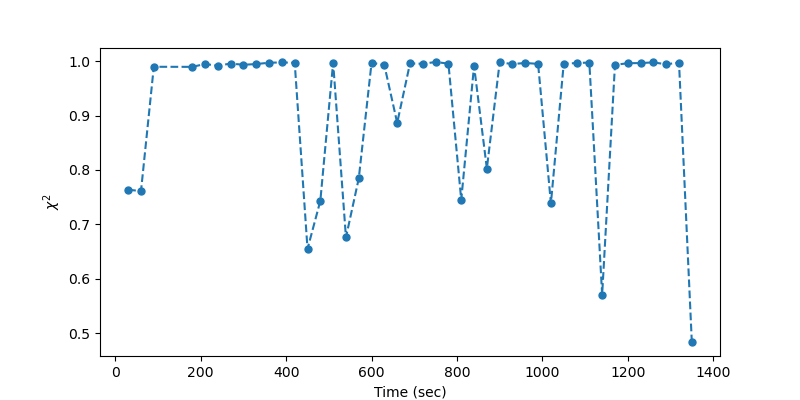

In [9]:
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207176, dyn_data_dir, first=0, last=-1, out_array=None)

23


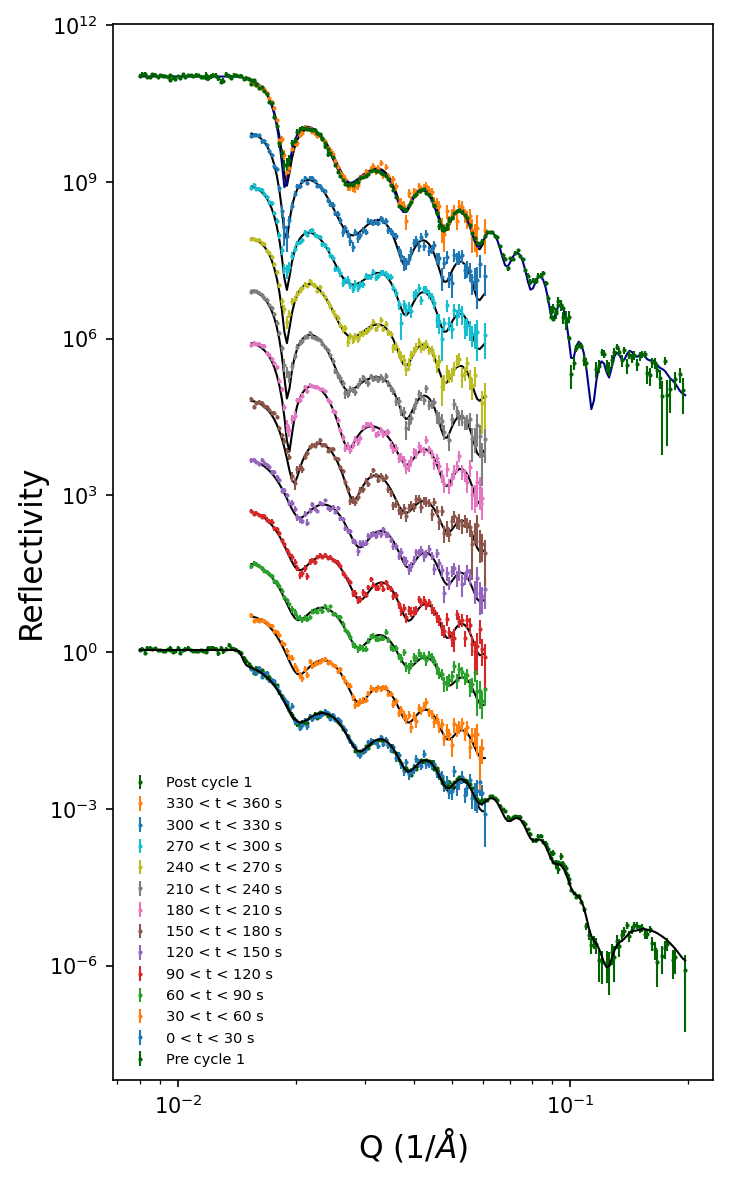

In [10]:
importlib.reload(summary_plots)

last_time = 12

file_list = summary_plots.plot_dyn_data(dynamic_run, 207161, 207169, first_index=0, last_index=last_time, delta_t=delta_t, model_name='model-loop-207168',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207169/__model-profile.dat
Processing: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Read in /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Model: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000240/model-loop-207168
Z offset = -159.572;    Z_max = 1002.6
Too many points: pruning down
MC file read: 0.0009496212005615234 sec
Done 5.374490976333618 sec
Processing: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Read in /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Model: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000210/model-loop-207168
Z offset = -139.742;    Z_max = 96

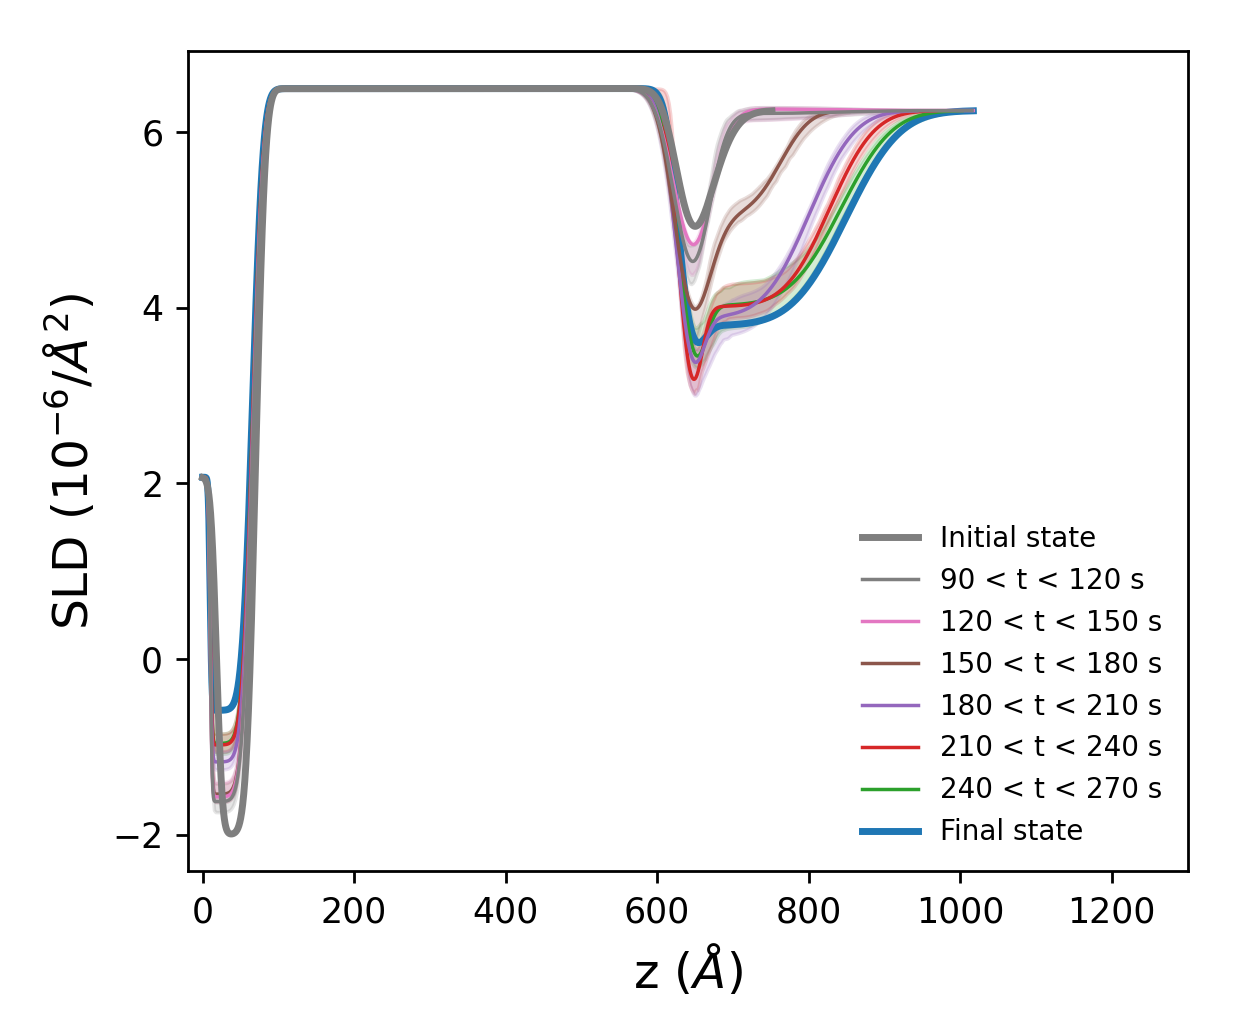

In [12]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207168.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 207161, 207169, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=True, model_file=model_file, model_name='model-loop-207168', legend_font_size=8, max_z=1300)

THF interface 29.767315099895264
material interface 18.6680172612351
material rho 3.690244438447533
material thickness 33.21387416625166
Ti rho -1.9982523408587178
THF interface [29.767315099895264, 56.0912313661183]
material interface [18.6680172612351, 13.267859354941164]
material rho [3.690244438447533, 3.460549199161475]
material thickness [33.21387416625166, 34.93307729921375]
Ti rho [-1.9982523408587178, -0.5830095770110832]
SEI interface [10.94582186160325]
SEI rho [3.7980399602179533]
SEI thickness [187.06369407396915]


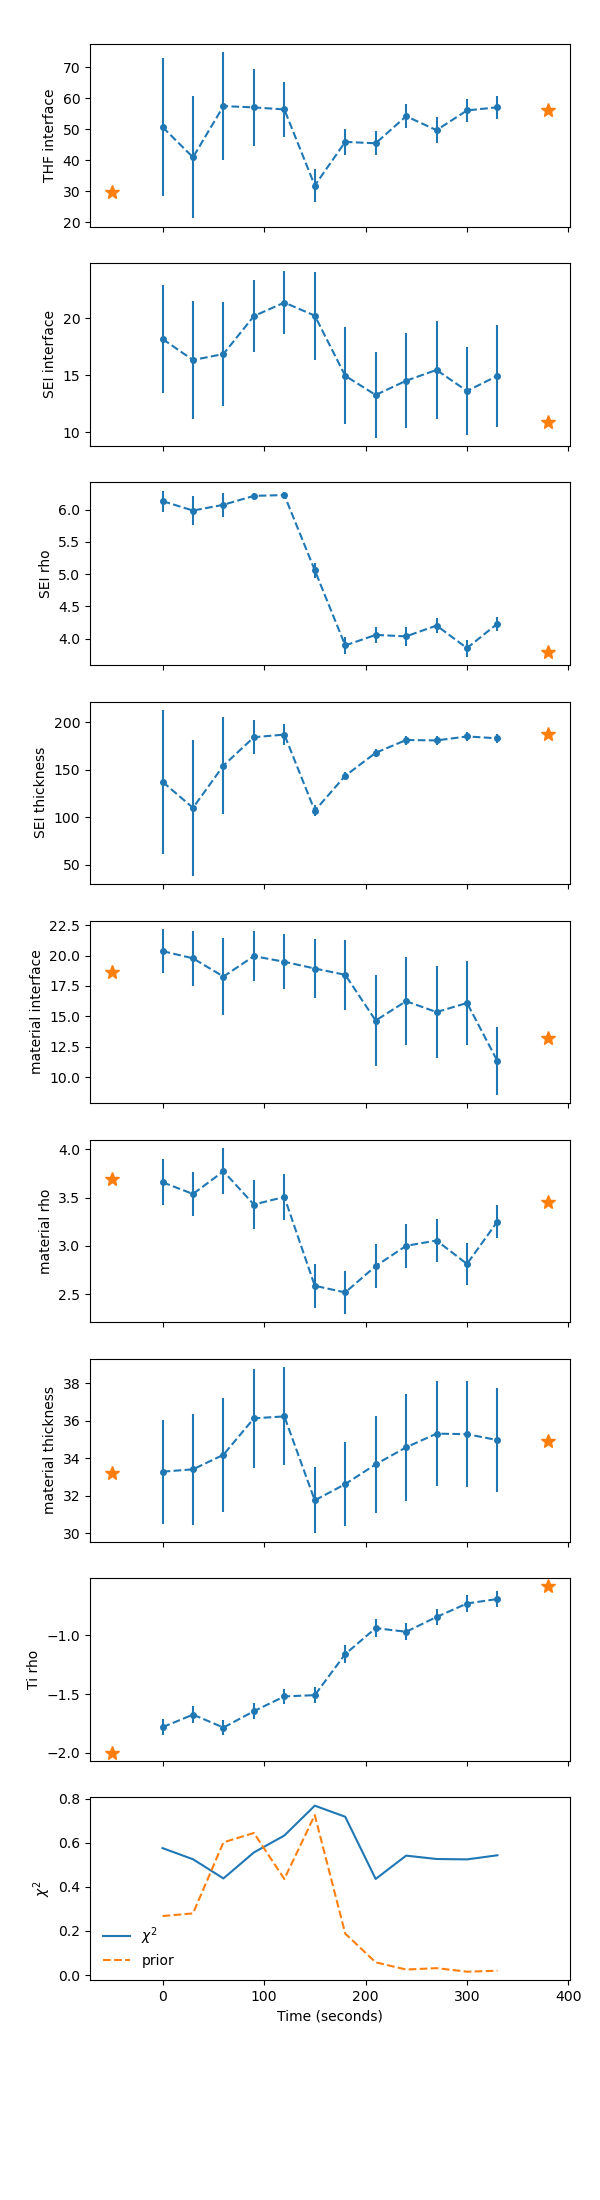

In [26]:
importlib.reload(summary_plots)

initial_state = 207161
timestamps, trend_data, trend_err = summary_plots.trend_data(file_list, initial_state, 207169, 
                                                   fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207168', model_file=None, add_plot=0)


In [24]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207168.json')
summary_plots.write_md_table(trend_file)

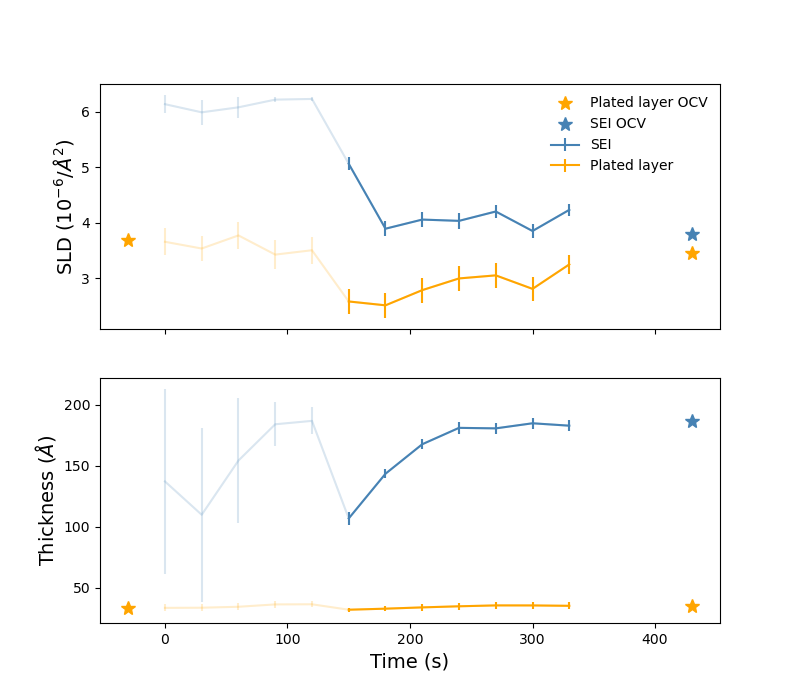

In [29]:

material_rho = [3.690244438447533, 3.460549199161475]
material_thickness = [33.21387416625166, 34.93307729921375]
sei_rho = [3.7980399602179533]
sei_thickness = [187.06369407396915]


i_start = 5

fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8,7), sharex=True)
plt.subplot(2, 1, 1)
plt.errorbar(timestamps, trend_data['SEI rho'], yerr=trend_err['SEI rho'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material rho'], yerr=trend_err['material rho'], alpha=0.2, color='orange')

plt.errorbar(timestamps[i_start:], trend_data['SEI rho'][i_start:], yerr=trend_err['SEI rho'][i_start:], label='SEI', color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material rho'][i_start:], yerr=trend_err['material rho'][i_start:], label='Plated layer', color='orange')

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_rho, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_rho, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

#plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.legend(frameon=False)



plt.subplot(2, 1, 2)
plt.errorbar(timestamps, trend_data['SEI thickness'], yerr=trend_err['SEI thickness'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['material thickness'], yerr=trend_err['material thickness'], alpha=0.2, color='orange')
plt.errorbar(timestamps[i_start:], trend_data['SEI thickness'][i_start:], yerr=trend_err['SEI thickness'][i_start:], color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['material thickness'][i_start:], yerr=trend_err['material thickness'][i_start:], color='orange')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Thickness ($\AA$)', fontsize=14)

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_thickness, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_thickness, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')
